In [1]:
import yastn
import yastn.tn.mps as mps
import matplotlib.pyplot as plt
import numpy as np
from operators import HXXZ, sumLn2, Ln, momentum_total

We want to recover 1305.3765 Fig. 3; starting with m/g=1/8 case

In [2]:
ops = yastn.operators.Spin12(sym='U1')  # "U1" enforces sum(Sz) conservation
#
# 1305.3765 is using x, mu; where x = 1/(g a)^2; mu = 2m/g^2 a and a=1 (?)
#
a = 1
g = 1 / 5
m = g / 8
e0 = a * g * g / 2
#
# this corresponds to x=25, mu=5/4 for a=1

In [4]:
# We want to recover 1305.3765 Fig. 3(b); running this takes some time ...
N = 160

H0 = HXXZ(N, a, m, ops=ops)
H1 = e0 * sumLn2(N, t=0, L0=0, a=1, v=1, Q=1, ops=ops)
Op = momentum_total(N=N, ops=ops)
Op2 = Op @ Op

D = 64  # MPS bond dimension; based on 1305.3765 this will be enough
charge = 0 # this is a total Sz-spin for U1 symmetry
psis, engs, OP2s = [], [], []

for state in range(5):
    print(f" STATE = {state} ")
    psi = mps.random_mps(H0, D_total=D, n=charge)
    # sweeps of 2-site dmrg
    out = mps.dmrg_(psi, [H0, H1], project=psis, max_sweeps=64, energy_tol=1e-10, method='2site', opts_svd={"D_total": D})
    # followed by 1-site sweeeps
    # out = mps.dmrg_(psi, [H0, H1], project=psis, max_sweeps=100, energy_tol=1e-10, method='1site')
    print(out)
    psis.append(psi)
    engs.append(out.energy)
    OP2s.append(mps.vdot(psi, Op2, psi).real)


 STATE = 0 
DMRG_out(sweeps=10, energy=-47.96075620183673, denergy=5.25091081726714e-12, max_dSchmidt=None, max_discarded_weight=3.4375263795481453e-07)
 STATE = 1 
DMRG_out(sweeps=64, energy=-47.79277912546457, denergy=2.9089336095466933e-07, max_dSchmidt=None, max_discarded_weight=1.8926464053994892e-05)
 STATE = 2 
DMRG_out(sweeps=64, energy=-47.78934473551899, denergy=3.6465632938131876e-05, max_dSchmidt=None, max_discarded_weight=6.145958600119e-05)
 STATE = 3 
DMRG_out(sweeps=64, energy=-47.771544981222824, denergy=8.901174307140991e-05, max_dSchmidt=None, max_discarded_weight=4.383246709995371e-05)
 STATE = 4 
DMRG_out(sweeps=64, energy=-47.77517518951805, denergy=6.918841940262155e-06, max_dSchmidt=None, max_discarded_weight=1.5154311627564232e-05)


(0.0, 0.3)

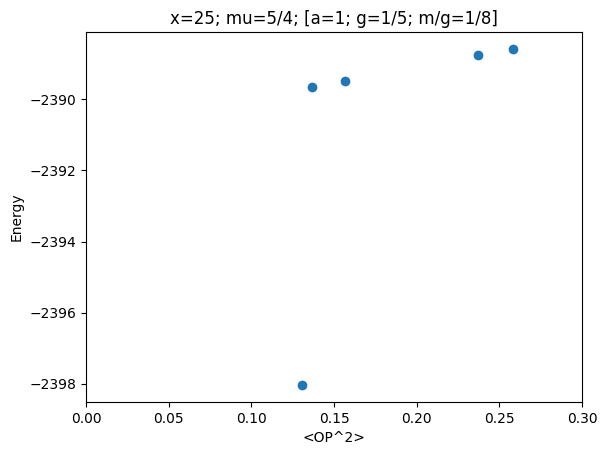

In [5]:

plt.plot(OP2s, np.array(engs) / e0, 'o')
plt.xlabel("<OP^2>")
plt.ylabel("Energy")
plt.title("x=25; mu=5/4; [a=1; g=1/5; m/g=1/8]")
plt.xlim([0, 0.3])